In [1]:
#change this cell to change season and player name
season = '2009/2010'
ssn = '0506'
length = int(20)

In [2]:
import os
import json
import codecs
import pandas as pd
import codecs
import StatsbombPitch as sb
main_df = pd.DataFrame(data=None)
path_match = "/home/kirugulige/Documents/Football-Analytics/open-data-master/data/events/" #location for play by play events
for root, dirs, files in os.walk('/home/kirugulige/Documents/Football-Analytics/open-data-master/data/matches'):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            with codecs.open(root + str('/') + file,encoding='utf-8') as data_file:
                data = json.load(data_file)
                df = pd.DataFrame(data=None)
                df = pd.json_normalize(data, sep = "_")
            #for x in df.competition_country_name:
            #    if x == 'Spain':
            #        print(df.match_id)
            for i in range(len(df)):
                if df.iloc[i]['competition_country_name'] == 'Spain'  and df.iloc[i]['season_season_name'] == season :
                    match_no = df.iloc[i]['match_id'] #gets match with Spain as country
                    match_no = str(match_no) # from int to str 
                    with codecs.open(path_match + match_no + str(r'.json'),encoding="utf8") as event_file: #open the respective file
                        df_match = json.load(event_file)
                        df_match2 = pd.DataFrame(data=None)
                        df_match2 = pd.json_normalize(df_match,sep="_")    
             
                    main_df = main_df.append(df_match2,ignore_index=True,sort=False)                    
print('Done')

Done


In [3]:
#change player_id to get different player 5503 = Messi
Player = main_df.query('player_id == 5503  & type_id ==43 & play_pattern_id ==1 & duration >= 1.50')

In [4]:
player_name = Player.player_name.iloc[0]
#df[['a','b']]
Player = Player [['location','carry_end_location']]

In [5]:
from math import sqrt
distance= []
for i in range(len(Player)):
    distance.append(sqrt((Player.iloc[i]['carry_end_location'][0] - Player.iloc[i]['location'][0])**2 + ((Player.iloc[i]['carry_end_location'][1] - Player.iloc[i]['location'][1])**2)))
    #using distance formula above (sqrt((x2-x1)^2 + (y2-y1)^2))

In [6]:
Player['dribble_distance'] = distance

In [7]:
Player.head()

,location,carry_end_location,dribble_distance
109,"[64.4, 78.2]","[64.4, 73.7]",4.500000
800,"[53.3, 25.5]","[54.4, 27.9]",2.640076
1000,"[75.5, 58.8]","[71.0, 69.7]",11.792370
1015,"[94.6, 65.1]","[89.9, 58.0]",8.514693
1417,"[67.0, 37.0]","[85.8, 21.6]",24.302263


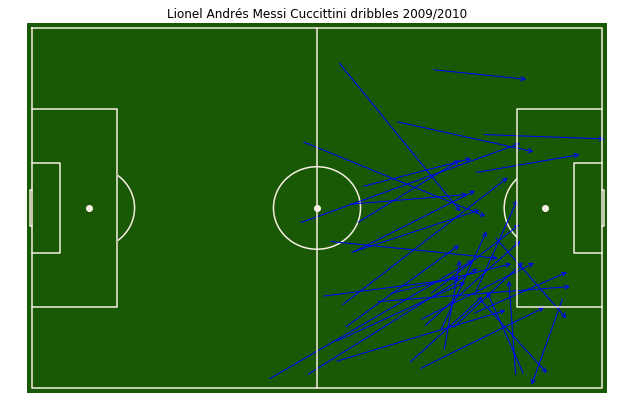

In [8]:
import matplotlib.pyplot as plt
sb.sb_pitch("#195905","#faf0e6","horizontal","full")
plt.gca().invert_yaxis()
y_cary_end = 0
y_loc = 0
for i in range(len(Player)):
    y_cary_end = -2*(Player.iloc[i]['carry_end_location'][1] - 40) + Player.iloc[i]['carry_end_location'][1] 
    y_loc =  -2*(Player.iloc[i]['location'][1] - 40) + Player.iloc[i]['location'][1] 
    if Player.iloc[i]['carry_end_location'][0] >= 90 and Player.iloc[i]['dribble_distance'] >= length:
        plt.annotate("", xy = (Player.iloc[i]['carry_end_location'][0],Player.iloc[i]['carry_end_location'][1]), xycoords = 'data',
               xytext = (Player.iloc[i]['location'][0],Player.iloc[i]['location'][1] ), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
        plt.title(player_name +str(' dribbles ') + season)
        
plt.show()